In [4]:
import cv2 
import numpy as np
import os 
import matplotlib.pyplot as plt

In [2]:
image_path = '/Users/dimka777/Documents/Магистратура/Mag_2_semester/ImageProcessing/LW_1/test.jpg'

In [3]:
image = cv2.imread(image_path)

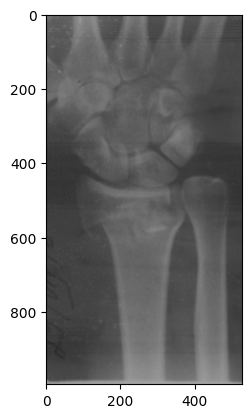

In [5]:
plt.imshow(image)

In [10]:
image_L = cv2.cvtColor(image, cv2.COLOR_RGB2LAB)[...,0]

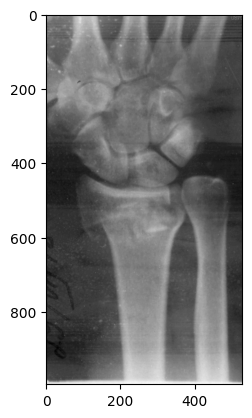

In [11]:
plt.imshow(image_L, cmap='gray')

In [39]:
def get_hist(image):
    histogram, bin_edges = np.histogram(image, bins=256)
    # plt.plot(bin_edges[0:-1], histogram) 
    ax = plt.hist(image.ravel(), bins = 256, range =(0, 255))
    
    plt.show()
    return image.ravel()

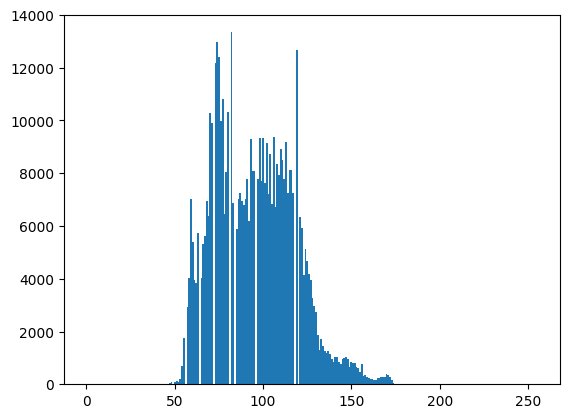

In [73]:
ravel  = get_hist(image_L)

In [72]:
I_min = ravel.min()
I_max = ravel.max()

In [47]:
# Контраст Майкельсона
contrast  = (I_max-I_min)/(I_max+I_min)

In [48]:
print(contrast)

0.6073059360730594


In [61]:
def deg_gamma(img, gamma):
    return np.array(255*(img / 255) ** gamma, dtype = 'uint8')

In [68]:
def hist_normalization(img, a=0, b=255):
	# get max and min
	c = img.min()
	d = img.max()
 
	out = img.copy()
 
	# normalization
	out = (b-a) / (d - c) * (out - c) + a
	out[out < a] = a
	out[out > b] = b
	out = out.astype(np.uint8)
	
	return out

In [66]:
img_gamma = deg_gamma(image, 1)

In [69]:
img_norm = hist_normalization(image)

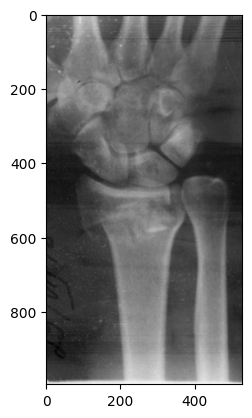

In [70]:
plt.imshow(img_norm, cmap='gray')

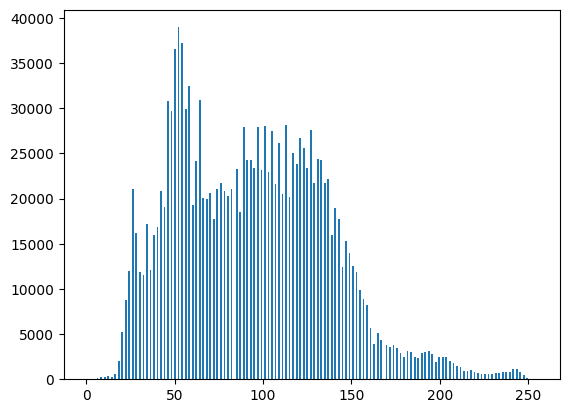

In [71]:
ravel  = get_hist(img_norm)